In [112]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [113]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#(EDA)


In [114]:
# dimension
df.shape

(1599, 12)

In [115]:
# column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [116]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [117]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [118]:
# null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [119]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


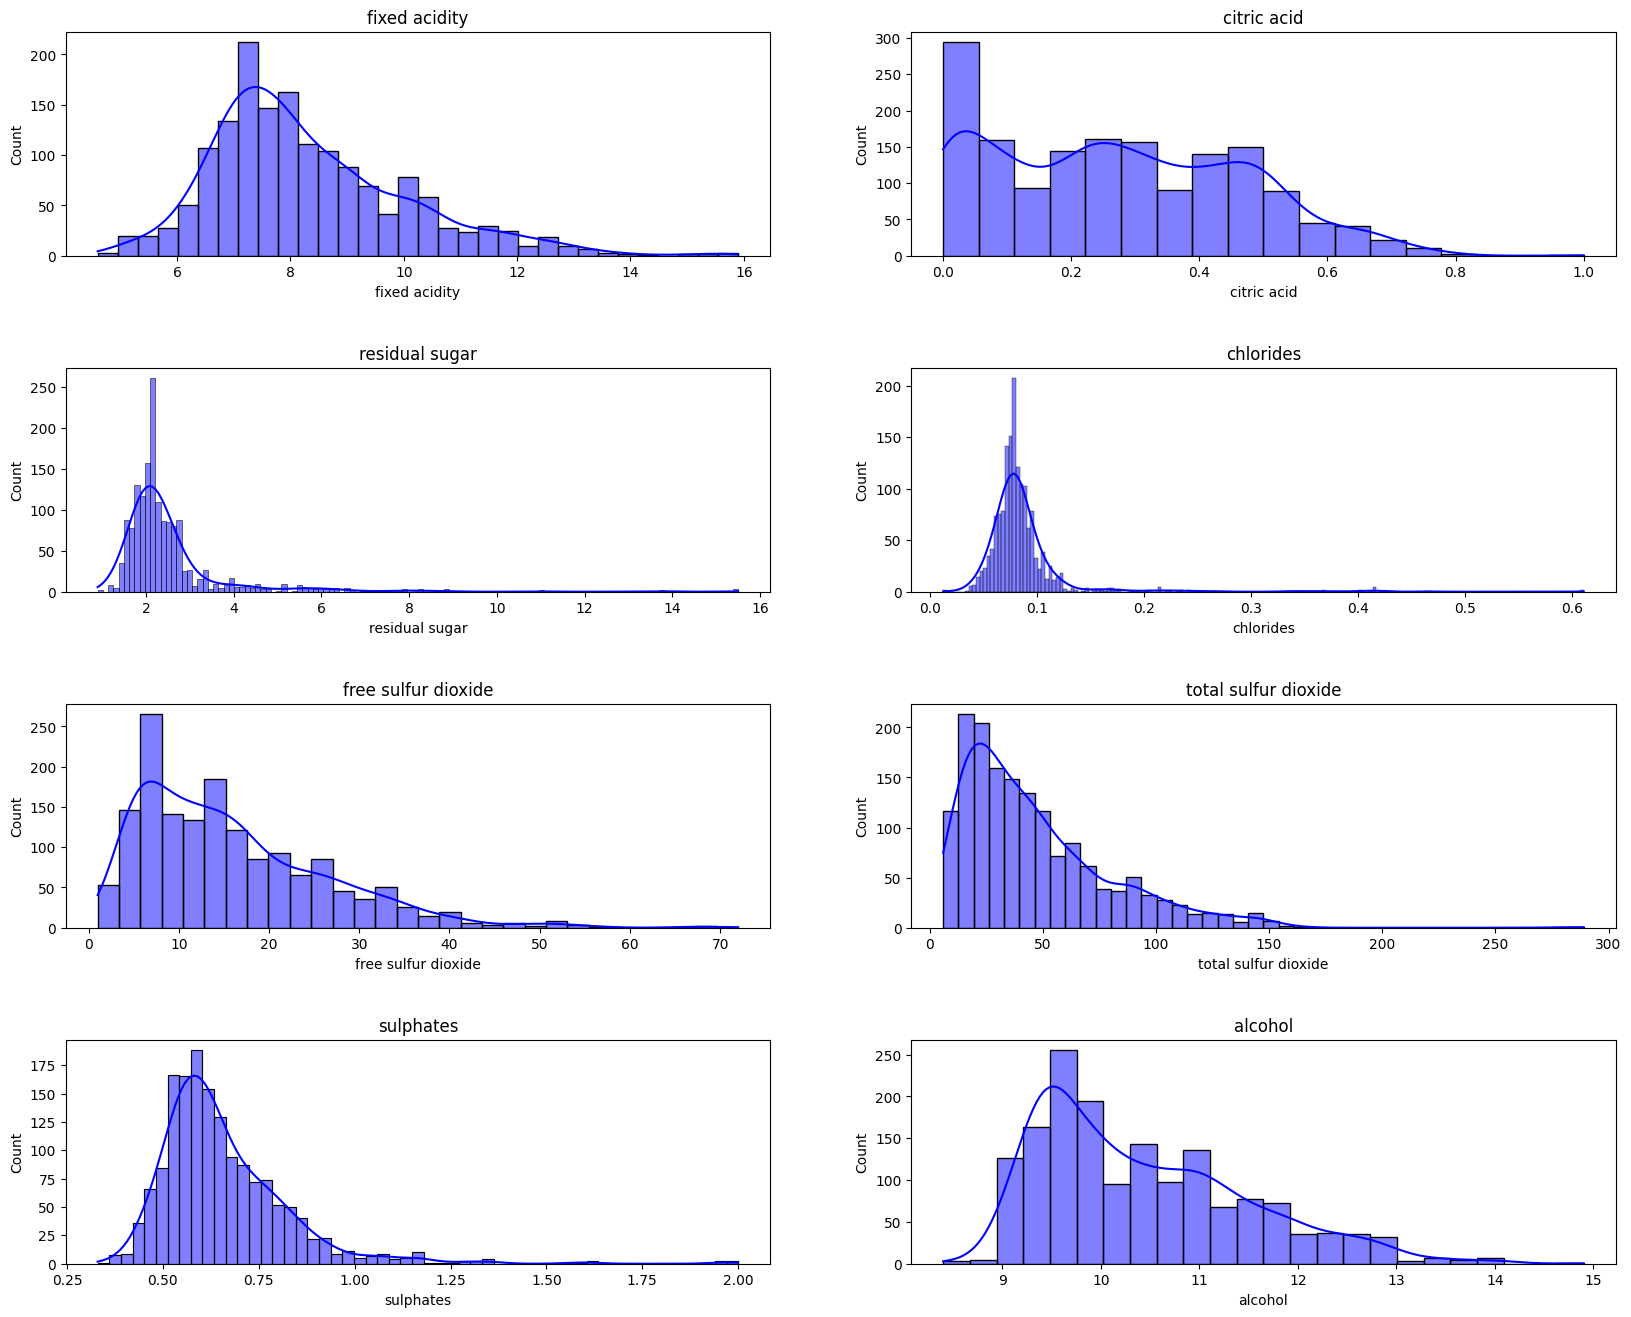

In [120]:
#SKEWNESS check
# mean < median == left skewed
# mean > median == right skewed
col_r = ['fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']

fig, axs = plt.subplots(4, 2, figsize=(20, 16))
for ax, column in zip(axs.flat, col_r):
    sns.histplot(data=df, x=column, ax=ax, kde=True, color='b')
    ax.set_title(column)

plt.subplots_adjust(hspace=0.5)
plt.show()

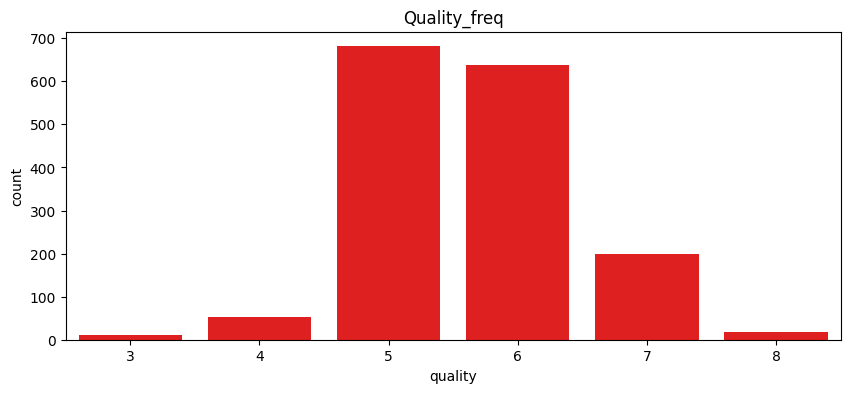

In [121]:
# Frequency of quality
plt.figure(figsize = (10, 4), facecolor = "white")
sns.countplot(data=df, x='quality', color='red')
plt.title(f"Quality_freq")
plt.show()

In [122]:
for i in range(11):
    display(df.iloc[:,i].value_counts())

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: count, Length: 96, dtype: int64

volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: count, Length: 143, dtype: int64

citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: count, Length: 80, dtype: int64

residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: count, Length: 91, dtype: int64

chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64

free sulfur dioxide
6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11.0     59
13.0     57
8.0      56
14.0     50
3.0      49
18.0     46
4.0      41
21.0     41
19.0     39
24.0     34
26.0     32
23.0     32
20.0     30
27.0     29
25.0     24
29.0     23
28.0     23
22.0     22
32.0     22
31.0     20
34.0     18
30.0     16
35.0     15
36.0     11
33.0     11
38.0      9
41.0      7
40.0      6
39.0      5
48.0      4
51.0      4
45.0      3
1.0       3
43.0      3
42.0      3
52.0      3
37.0      3
68.0      2
55.0      2
50.0      2
37.5      2
53.0      1
72.0      1
57.0      1
47.0      1
5.5       1
2.0       1
46.0      1
54.0      1
40.5      1
66.0      1
Name: count, dtype: int64

total sulfur dioxide
28.0     43
24.0     36
15.0     35
18.0     35
23.0     34
         ..
139.0     1
149.0     1
152.0     1
155.0     1
165.0     1
Name: count, Length: 144, dtype: int64

density
0.99720    36
0.99680    35
0.99760    35
0.99800    29
0.99620    28
           ..
0.99684     1
0.99764     1
0.99473     1
0.99320     1
0.99651     1
Name: count, Length: 436, dtype: int64

pH
3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
3.75     1
2.74     1
3.70     1
3.85     1
2.90     1
Name: count, Length: 89, dtype: int64

sulphates
0.60    69
0.58    68
0.54    68
0.62    61
0.56    60
        ..
1.00     1
1.59     1
0.33     1
1.26     1
1.01     1
Name: count, Length: 96, dtype: int64

alcohol
9.500000     139
9.400000     103
9.800000      78
9.200000      72
10.000000     67
            ... 
9.950000       1
9.233333       1
9.250000       1
9.050000       1
10.750000      1
Name: count, Length: 65, dtype: int64

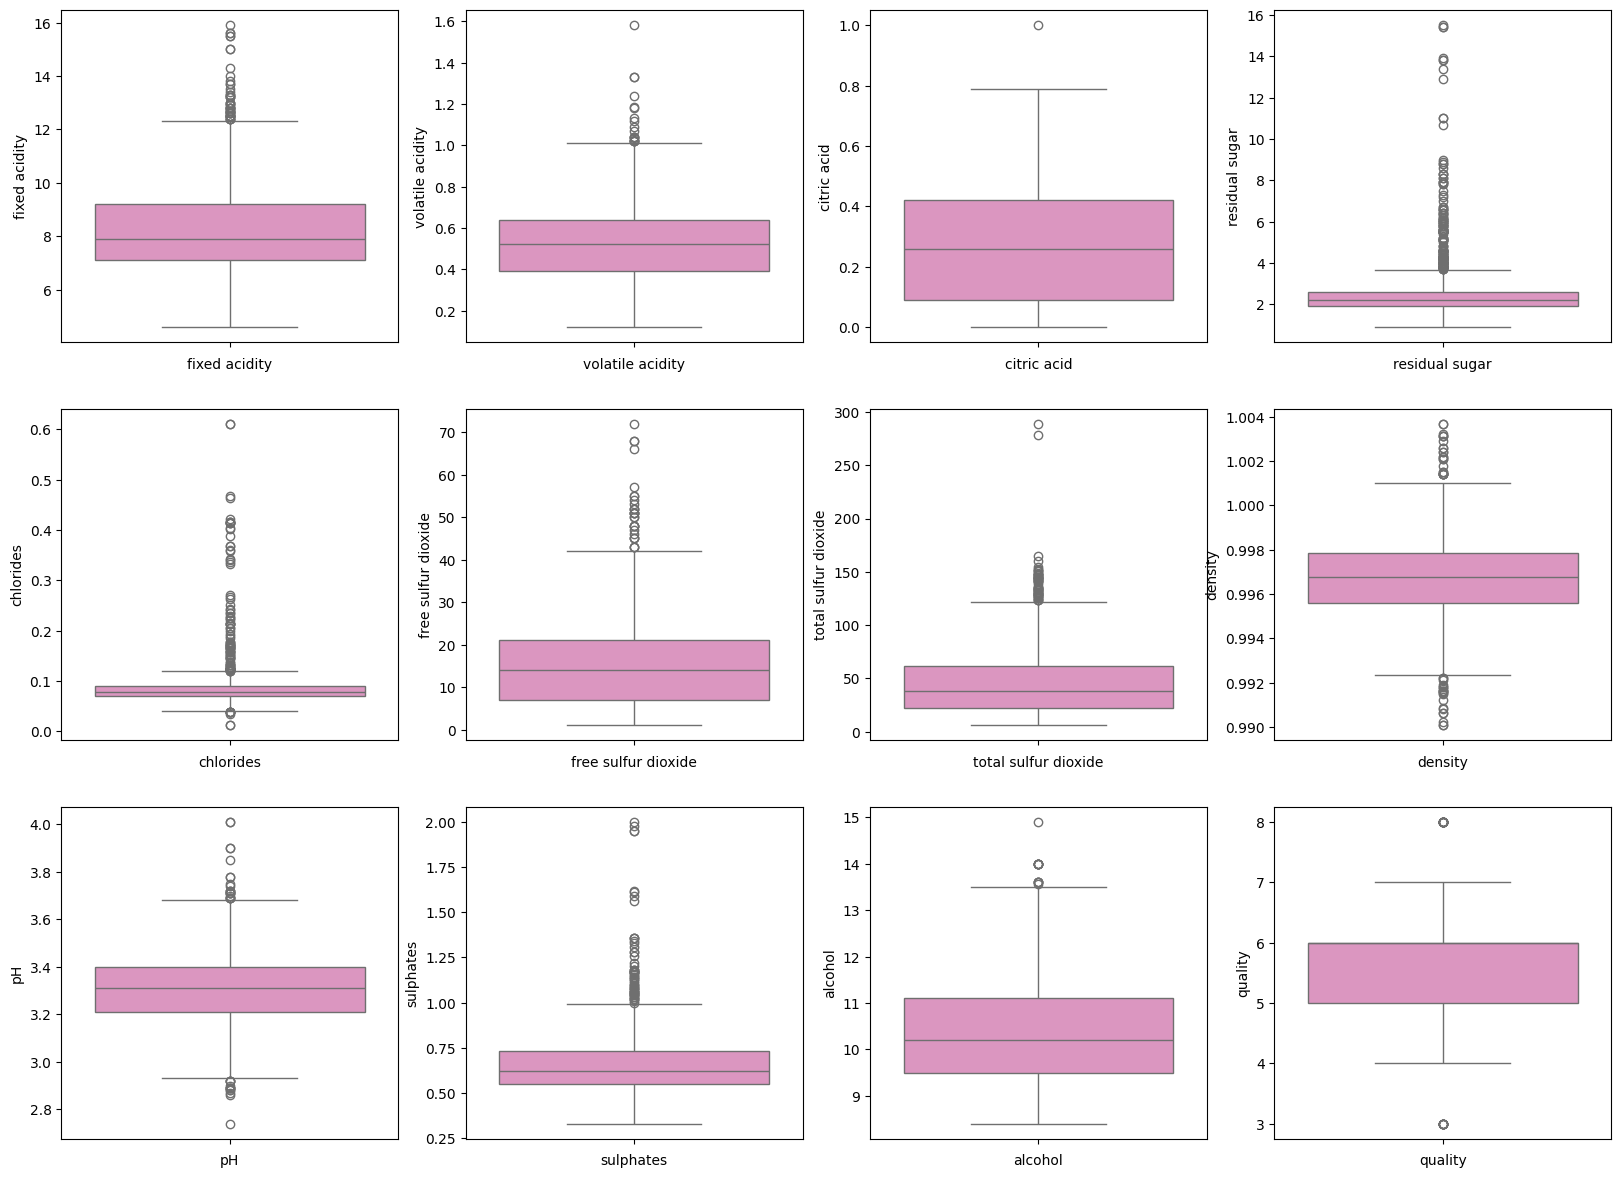

In [123]:
#BOXPLOT -- to find out the outliers

plt.figure(figsize=(20,25))
p=1
for i in df:
  if p <=13:
    plt.subplot(5,4,p)
    sns.boxplot(df[i], palette='Set2_r')
    plt.xlabel(i)
  p+=1
plt.show()

In [124]:
#Removing the outliers
from scipy.stats import zscore

z = np.abs(zscore(df))
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777,0.787823
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777,0.787823
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777,0.450848
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246,0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294,0.787823
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364,0.450848
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630,0.450848
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308,0.787823


In [125]:
df_new = df[(z.iloc[:,:11]<3).all(axis=1)]

print(df.shape[0] - df_new.shape[0])
print((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)
print(df_new.shape[0], df.shape[1])
df = df_new
df

141
8.818011257035648 2
1458 12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### Checking for skewness

In [126]:
# Cheking the skewness
df.skew().sort_values()

density                 0.055543
pH                      0.113039
quality                 0.248823
citric acid             0.292600
volatile acidity        0.392097
alcohol                 0.757396
fixed acidity           0.820879
free sulfur dioxide     0.869727
sulphates               0.893297
total sulfur dioxide    1.185230
chlorides               2.307274
residual sugar          2.450707
dtype: float64

In [127]:
# Removing skewness using cuberoot method
df_process = pd.DataFrame(data=df)
df_process['residual sugar'] = np.cbrt(df['residual sugar'])
df_process['alcohol'] = np.cbrt(df['alcohol'])
df_process['chlorides'] = np.cbrt(df['chlorides'])
df_process['total sulfur dioxide'] = np.cbrt(df['total sulfur dioxide'])
df_process['sulphates']= np.cbrt(df['sulphates'])
df_process['free sulfur dioxide'] = np.cbrt(df['free sulfur dioxide'])
df_process['fixed acidity'] = np.cbrt(df['fixed acidity'])

In [128]:
# Cheking the skewness of the data
df_process.skew().sort_values(ascending=False)

residual sugar          1.629756
chlorides               1.056128
alcohol                 0.643830
fixed acidity           0.527560
sulphates               0.526494
volatile acidity        0.392097
total sulfur dioxide    0.343010
citric acid             0.292600
quality                 0.248823
free sulfur dioxide     0.127793
pH                      0.113039
density                 0.055543
dtype: float64

We are going to use the Log Transformation for the columns the skewness remains > 0.5

In [129]:
# Removing skewness using Log transformation
df_process['alcohol'] = np.log(df_process['alcohol'])
df_process['residual sugar'] = np.log(df_process['residual sugar'])
df_process['chlorides'] = np.log(df_process['chlorides'])
df_process['fixed acidity'] = np.log(df_process['fixed acidity'])
df_process['sulphates'] = np.log(df_process['sulphates'])

In [130]:
# Cheking the skewness of the data
df_process.skew().sort_values(ascending=False)

residual sugar          1.229070
alcohol                 0.588835
chlorides               0.528828
volatile acidity        0.392097
fixed acidity           0.377100
sulphates               0.345344
total sulfur dioxide    0.343010
citric acid             0.292600
quality                 0.248823
free sulfur dioxide     0.127793
pH                      0.113039
density                 0.055543
dtype: float64

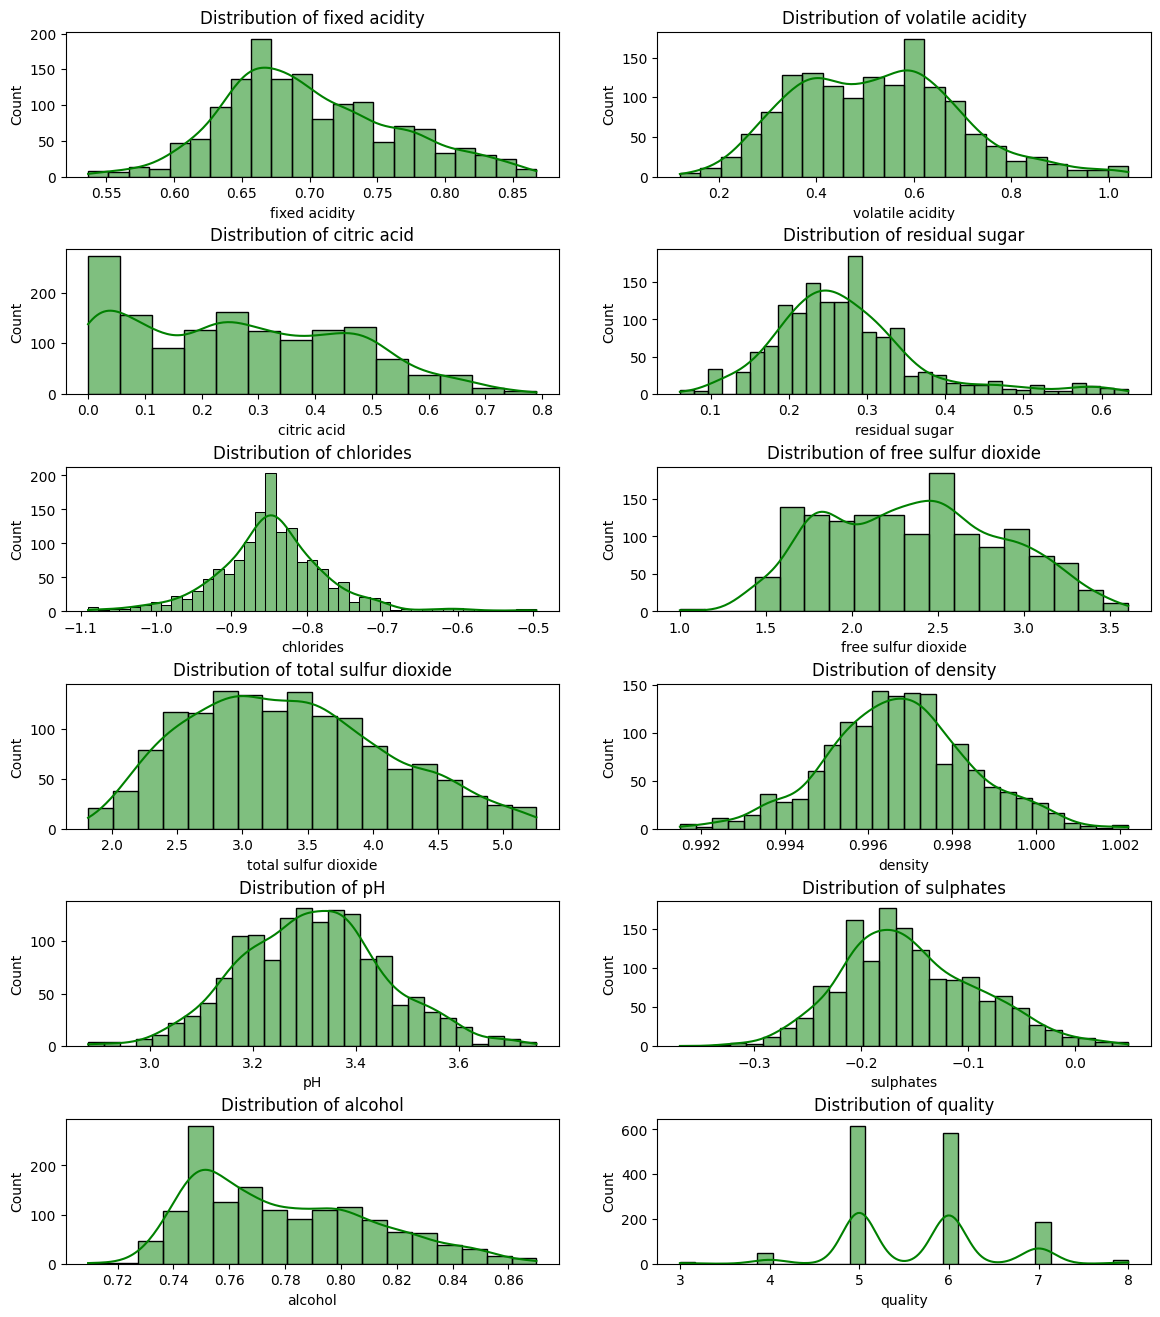

In [131]:
fig, axs = plt.subplots(6, 2, figsize=(14, 16))
for ax, column in zip(axs.flat, df_process.columns):
    sns.histplot(data=df_process, x=column, ax=ax, kde=True, color='g')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

In [132]:
# Asigning the transform data to the principal dataset
df = df_process

#### Multivariate Analysis

#### Correlation between target variable and independent variables.

In [134]:
# Checking the correlation between features and the target.
cor = df.corr()
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.295813,0.692400,0.204999,0.232103,-0.163909,-0.096003,0.664021,-0.721165,0.190975,-0.039221,0.129743
volatile acidity,-0.295813,1.000000,-0.589286,0.036963,0.079752,0.032589,0.102031,-0.000446,0.252900,-0.356126,-0.212932,-0.362783
citric acid,0.692400,-0.589286,1.000000,0.188923,0.104443,-0.097483,-0.015382,0.372338,-0.521270,0.308570,0.163495,0.238244
residual sugar,0.204999,0.036963,0.188923,1.000000,0.184832,0.011569,0.106051,0.383786,-0.077378,0.067932,0.162090,0.050656
chlorides,0.232103,0.079752,0.104443,0.184832,1.000000,-0.030020,0.078208,0.393204,-0.202248,0.002094,-0.259783,-0.146522
free sulfur dioxide,-0.163909,0.032589,-0.097483,0.011569,-0.030020,1.000000,0.751304,-0.041366,0.126631,0.052933,-0.086571,-0.064810
total sulfur dioxide,-0.096003,0.102031,-0.015382,0.106051,0.078208,0.751304,1.000000,0.132889,0.020039,-0.010013,-0.268901,-0.205050
density,0.664021,-0.000446,0.372338,0.383786,0.393204,-0.041366,0.132889,1.000000,-0.311217,0.133096,-0.465070,-0.177758
pH,-0.721165,0.252900,-0.521270,-0.077378,-0.202248,0.126631,0.020039,-0.311217,1.000000,-0.025521,0.137757,-0.084922
sulphates,0.190975,-0.356126,0.308570,0.067932,0.002094,0.052933,-0.010013,0.133096,-0.025521,1.000000,0.253730,0.394973


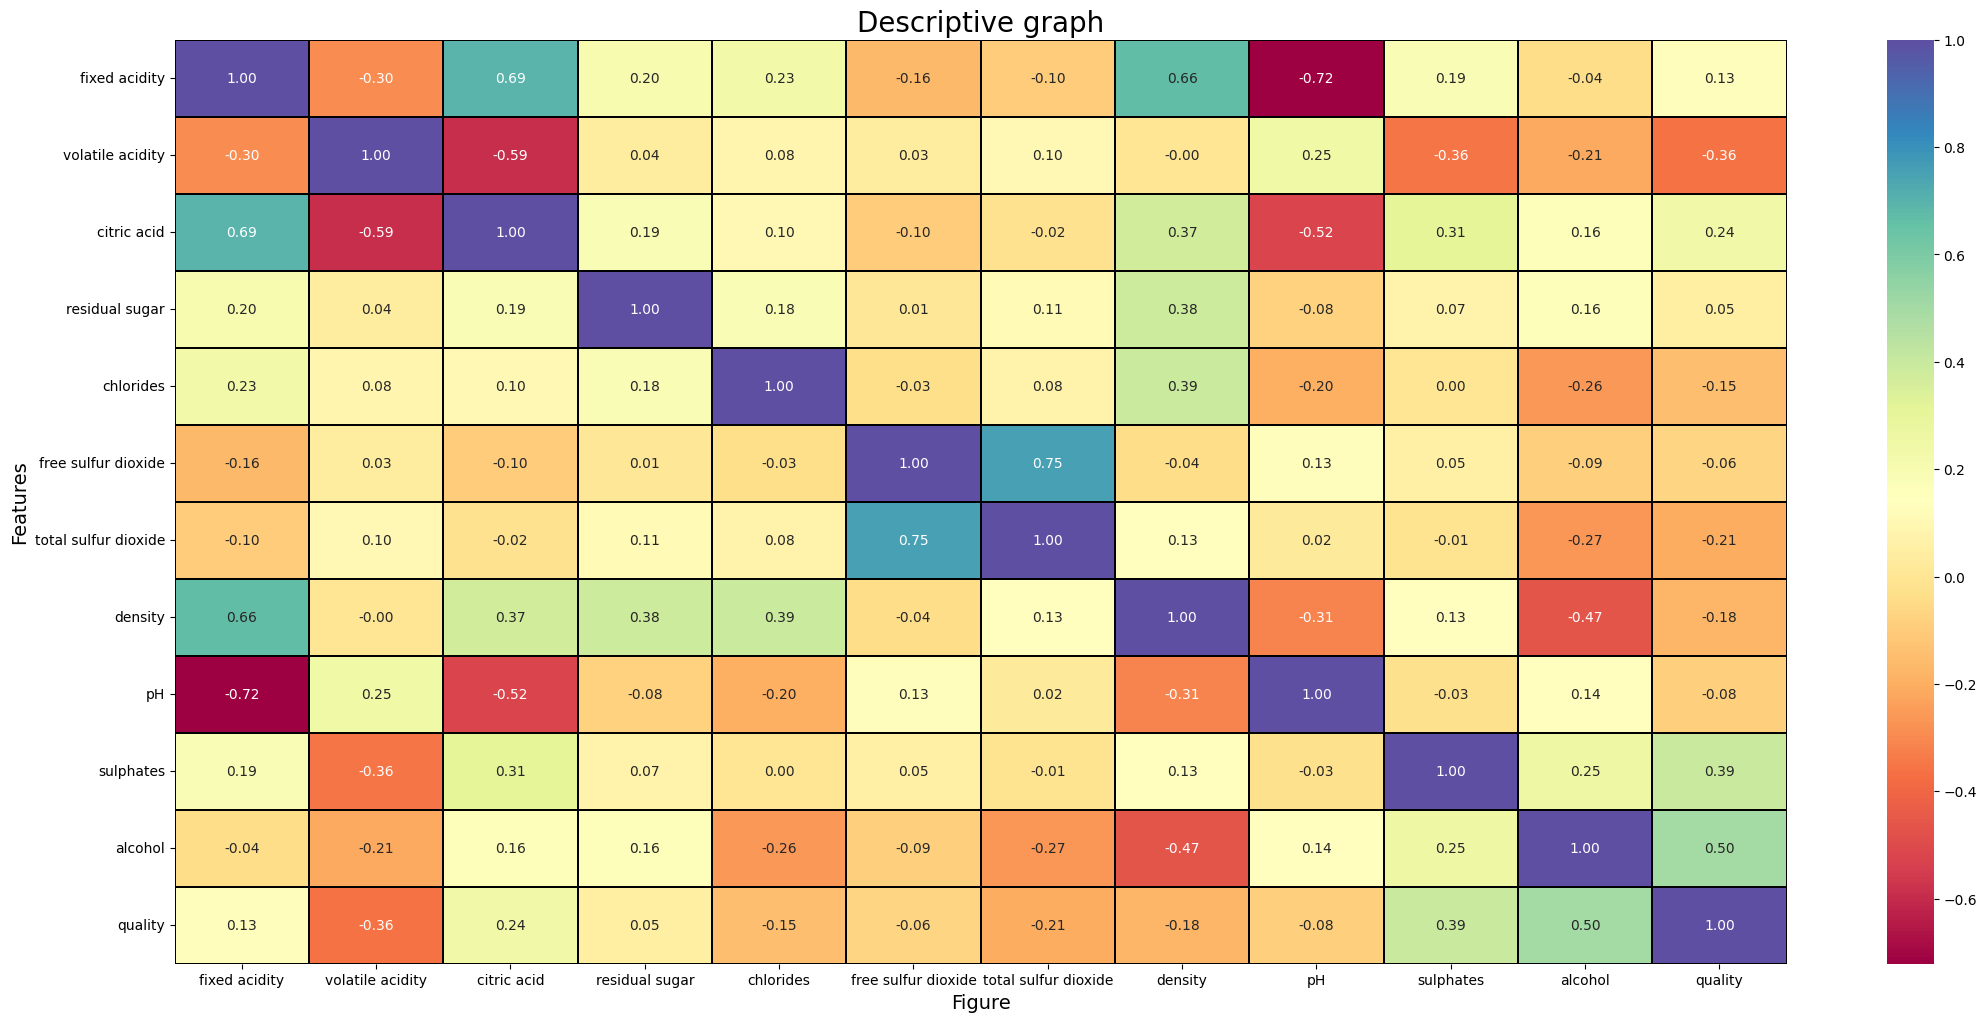

In [135]:
plt.figure(figsize=(26,12))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2, linecolor='black',cmap='Spectral')
plt.xlabel('Figure', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Descriptive graph', fontsize=20)
plt.show()

In [136]:
cor['quality'].sort_values(ascending = False).to_frame()

,quality
quality,1.000000
alcohol,0.497173
sulphates,0.394973
citric acid,0.238244
fixed acidity,0.129743
residual sugar,0.050656
free sulfur dioxide,-0.064810
pH,-0.084922
chlorides,-0.146522
density,-0.177758


### Separating features and label

In [137]:
x = df.drop('quality', axis = 1)
y = df['quality']

#### Feature Scaling using Standard Scalarization

In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.513603,1.038708,-1.387413,-0.621768,-0.181052,-0.276875,-0.151874,0.629873,1.374768,-0.609543,-1.030072
1,-0.237021,2.101325,-1.387413,0.456376,0.915970,1.096574,0.934243,0.047678,-0.823752,0.392467,-0.592859
2,-0.237021,1.392914,-1.178214,0.034952,0.643353,0.198376,0.561889,0.164117,-0.398232,0.159607,-0.592859
3,1.663763,-1.440732,1.541370,-0.621768,-0.238205,0.404518,0.740417,0.746312,-1.107432,-0.428442,-0.592859
4,-0.513603,1.038708,-1.387413,-0.621768,-0.181052,-0.276875,-0.151874,0.629873,1.374768,-0.609543,-1.030072
...,...,...,...,...,...,...,...,...,...,...,...
1453,-1.443167,0.448365,-0.969015,-0.445456,0.548514,1.588604,0.232309,-1.058494,0.949248,-0.428442,0.130987
1454,-1.703741,0.153194,-0.864416,-0.117843,-1.059583,2.013192,0.467628,-0.930411,1.445688,0.966486,0.808099
1455,-1.359104,-0.082944,-0.707517,0.034952,-0.181052,1.387532,0.086430,-0.569449,0.736488,0.898129,0.619056
1456,-1.703741,0.714019,-0.759816,-0.445456,-0.238205,1.588604,0.232309,-0.726642,1.800288,0.615272,-0.173139


We have scaled the data using the Standard Scalarization method to overcome the issue of biases.

In [139]:
df_scaled = pd.concat([x,y], axis=1)
df_scaled.to_csv('winequality-red_standard.csv')

In [140]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,7.964170,fixed acidity
1,1.854803,volatile acidity
2,3.103597,citric acid
3,1.780340,residual sugar
4,1.233065,chlorides
5,2.578933,free sulfur dioxide
6,2.873485,total sulfur dioxide
7,6.675831,density
8,3.366065,pH
9,1.355343,sulphates


In [141]:
# Dropping fixed acidity column
x.drop('fixed acidity', axis=1, inplace=True)

In [142]:
# Again checking VIF value to review if the multicollinearity still exists or not
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
1,citric acid,2.825783
6,density,2.784110
5,total sulfur dioxide,2.765381
4,free sulfur dioxide,2.547361
9,alcohol,2.435458
0,volatile acidity,1.854257
2,residual sugar,1.554553
7,pH,1.531861
8,sulphates,1.339140
3,chlorides,1.224566


In [143]:
#Oversampling

y.value_counts()

quality
5    617
6    586
7    185
4     47
8     16
3      7
Name: count, dtype: int64

In [144]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

In [145]:
y1.value_counts()

quality
5    617
6    617
7    617
4    617
8    617
3    617
Name: count, dtype: int64

In [146]:
df_balanced = pd.concat([x1, y1], axis=1)

In [147]:
df_balanced.sort_values(by='quality', ascending=False)

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3701,-1.062278,1.076296,0.026088,-0.710869,-1.440090,-1.168589,0.074721,-1.011194,0.959538,0.324445,8
3358,-0.886763,0.217766,-0.557025,-1.128278,0.261882,-0.449397,-1.258347,-0.589144,0.835736,0.929836,8
3368,-0.597775,1.314470,1.915728,0.044616,-0.144954,-0.265982,0.574213,-0.008509,1.298007,2.338630,8
3367,-0.668335,0.556449,-0.724669,-0.852870,-0.783449,-1.170520,-0.965793,0.045134,0.582022,1.182733,8
3366,-1.029220,1.369166,0.435007,-0.544599,-1.293019,-1.106244,0.270333,-1.170050,0.199335,0.604425,8
...,...,...,...,...,...,...,...,...,...,...,...
1659,1.059023,-0.231076,-0.590877,-0.140344,-0.867171,-0.859632,0.460010,0.989923,-0.163980,-0.764300,3
1660,-0.199561,0.480694,-1.335910,2.186356,1.277540,0.090565,0.720531,0.642116,1.352248,-0.478045,3
1661,2.044646,-1.204079,-0.541721,-0.601281,-0.191695,-0.499089,-0.111318,0.804322,-0.353379,-0.567462,3
1662,0.628778,0.838339,-0.350377,3.437154,-1.256518,-1.144720,1.290058,-0.728309,-0.001683,-1.966618,3


In [148]:
# the output value is 1 if the wine quality is greater than 7 or else 0
df_balanced['quality_b'] = df_balanced['quality'].apply(lambda val: 1 if val >= 7 else 0)
df_balanced.sort_values(by='quality', ascending=False)

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_b
3701,-1.062278,1.076296,0.026088,-0.710869,-1.440090,-1.168589,0.074721,-1.011194,0.959538,0.324445,8,1
3358,-0.886763,0.217766,-0.557025,-1.128278,0.261882,-0.449397,-1.258347,-0.589144,0.835736,0.929836,8,1
3368,-0.597775,1.314470,1.915728,0.044616,-0.144954,-0.265982,0.574213,-0.008509,1.298007,2.338630,8,1
3367,-0.668335,0.556449,-0.724669,-0.852870,-0.783449,-1.170520,-0.965793,0.045134,0.582022,1.182733,8,1
3366,-1.029220,1.369166,0.435007,-0.544599,-1.293019,-1.106244,0.270333,-1.170050,0.199335,0.604425,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1659,1.059023,-0.231076,-0.590877,-0.140344,-0.867171,-0.859632,0.460010,0.989923,-0.163980,-0.764300,3,0
1660,-0.199561,0.480694,-1.335910,2.186356,1.277540,0.090565,0.720531,0.642116,1.352248,-0.478045,3,0
1661,2.044646,-1.204079,-0.541721,-0.601281,-0.191695,-0.499089,-0.111318,0.804322,-0.353379,-0.567462,3,0
1662,0.628778,0.838339,-0.350377,3.437154,-1.256518,-1.144720,1.290058,-0.728309,-0.001683,-1.966618,3,0


##  Modeling

### Finding the best random state

In [149]:
X = df_balanced.drop(['quality', 'quality_b'], axis = 1)
Y = df_balanced['quality_b']

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i

    return [best_random_state, best_acc]


# Build the model
model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, X, Y)
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 0.9712 at random_state 136


####  train test split

In [151]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=best_random_state)
print("x_train : ", x_train.shape)
print("x_test :  ", x_test.shape)
print("y_train : ", y_train.shape)
print("y_test :  ", y_test.shape)

x_train :  (2591, 10)
x_test :   (1111, 10)
y_train :  (2591,)
y_test :   (1111,)


### Classification Algorithms

In [152]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

In [153]:
# Functions
def calc_accuracy(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nModel: {model}")
    print(f"Confusion matrix: {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: {classification_report(y_test, y_pred)}" )
    print(f"Accuracy: {model} is {round(acc*100.0, 2)}%")
    return [acc, y_pred]

best model

In [154]:
models = {'rfc' : RandomForestClassifier(),
          'gbc': GradientBoostingClassifier(),
          'abc': AdaBoostClassifier(),
          'lg': LogisticRegression(),
          'svc': SVC(),
          }
accuracy = {}
y_pred = {}

for id_model, model in models.items():
    acc, pred = calc_accuracy(model)
    accuracy[id_model] = acc
    y_pred[id_model] = pred


Model: RandomForestClassifier()
Confusion matrix: [[727  13]
 [ 20 351]]
Classification report:               precision    recall  f1-score   support

           0       0.97      0.98      0.98       740
           1       0.96      0.95      0.96       371

    accuracy                           0.97      1111
   macro avg       0.97      0.96      0.97      1111
weighted avg       0.97      0.97      0.97      1111

Accuracy: RandomForestClassifier() is 97.03%

Model: GradientBoostingClassifier()
Confusion matrix: [[708  32]
 [ 28 343]]
Classification report:               precision    recall  f1-score   support

           0       0.96      0.96      0.96       740
           1       0.91      0.92      0.92       371

    accuracy                           0.95      1111
   macro avg       0.94      0.94      0.94      1111
weighted avg       0.95      0.95      0.95      1111

Accuracy: GradientBoostingClassifier() is 94.6%

Model: AdaBoostClassifier()
Confusion matrix: [[696  4

In [155]:
accuracy

{'rfc': 0.9702970297029703,
 'gbc': 0.945994599459946,
 'abc': 0.9126912691269127,
 'lg': 0.9234923492349235,
 'svc': 0.9324932493249325}

The model with best accuracy is 'rfc' RandomforestClassifier with 96.57% of accuracy.

### Hyper Parameter Tuning

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# Initialize the RandomForestClassifier model
model = RandomForestClassifier()

# Perform search with cross-validation
grid_search = GridSearchCV(model, param, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [160]:
best_params

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

These are the best parameters for training the model.

In [161]:
best_model = ExtraTreesClassifier(criterion = 'entropy', max_depth = 20, max_features = 'auto', min_samples_leaf = 1,
                                  min_samples_split = 2, n_estimators = 100, n_jobs=-1, random_state=136)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 97.84%


### Plotting ROC and compare AUC for  the best model

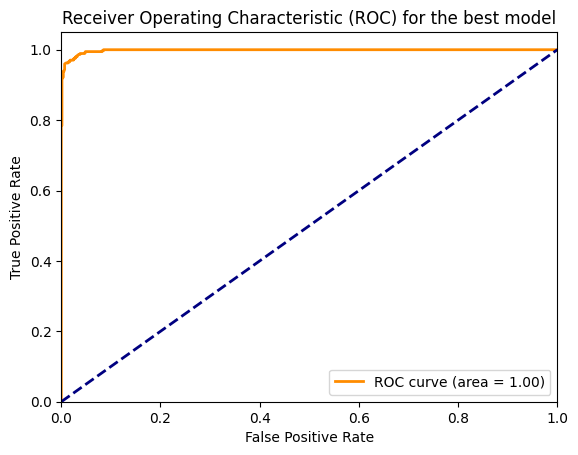

In [163]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve for the best model
y_score = best_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for the best model')
plt.legend(loc='lower right')
plt.show()

In [1]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=best_model)
display.plot()

NameError: name 'y_test' is not defined

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 97.84%.

### Saving the model

In [165]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "Red_Wine_Quality_Analysis.pkl")

['Red_Wine_Quality_Analysis.pkl']